## Power for pcqtls
are pcqtls (especially pc1qtls) boosting power to detect signals that exist in signle egene analysis, but just are below detection thresholds?

Looking at the set of pcqtls that don't overlap with eqtls, then ask if the nominal p value distribution for the eqtls is enriched for low p values

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm.auto import tqdm  # for notebooks

### load in data
nominal p values and overlap dfs

In [292]:
tissue_id = 'Cells_Cultured_fibroblasts' # because only one cell type

prefix = '/home/klawren/oak/pcqtls'

In [286]:
# load nominal p value dfs

def var_pos(df):
    return df['variant_id'].str.split('_').str[1].astype(int)

# load in e nominal
def load_e_nominal(path):
    e_nominal_df = pd.read_parquet(path)
    #e_nominal_df['variant_pos'] = var_pos(e_nominal_df)
    e_nominal_df['cluster_id'] = e_nominal_df['phenotype_id'].str.split('_e_').str[0]
    #e_nominal_df['egene_id'] = e_nominal_df['phenotype_id'].str.split('_e_').str[1]
    return e_nominal_df

e_nominal_dfs=[]
for chr_id in tqdm(range(1,23)):
    e_nominal_dfs.append(load_e_nominal(f'{prefix}/output/control_eqtl/{tissue_id}/{tissue_id}.v8.cluster_genes.cis_qtl_pairs.chr{chr_id}.parquet'))

e_nominal_df = pd.concat(e_nominal_dfs)

  0%|          | 0/22 [00:00<?, ?it/s]

In [315]:
def load_pc_nominal(path):
    pc_nominal_df = pd.read_parquet(path)
    #pc_nominal_df['variant_pos'] = var_pos(pc_nominal_df)
    pc_nominal_df['cluster_id'] = pc_nominal_df['phenotype_id'].str[:-4]
    #pc_nominal_df['cluster_size'] = pc_nominal_df['phenotype_id'].str.split('_').str.len() - 1
    return pc_nominal_df

pc1_nominal_dfs=[]
for chr_id in tqdm(range(1,23)):
    pc1_nominal_dfs.append(load_pc_nominal(f'{prefix}/output/pcqtl/{tissue_id}/{tissue_id}.v8.pc_1.cis_qtl_pairs.chr{chr_id}.parquet'))
pc1_nominal_df = pd.concat(pc1_nominal_dfs)


pc2_nominal_dfs=[]
for chr_id in tqdm(range(1,23)):
    pc2_nominal_dfs.append(load_pc_nominal(f'{prefix}/output/pcqtl/{tissue_id}/{tissue_id}.v8.pc_2.cis_qtl_pairs.chr{chr_id}.parquet'))
pc2_nominal_df = pd.concat(pc2_nominal_dfs)

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

In [ ]:
# write out? This was taking forever, so skiiping for now. It's ~ 6 minutes to load in data 

#e_nominal_df.to_csv(f'{e_out_prefix}/{tissue_id}.v8.cluster_genes.cis_qtl_pairs.csv.gz', sep='\t', compression='gzip')
#pc1_nominal_df.to_csv(f'{pc_out_prefix}/{tissue_id}.v8.pc_1.cis_qtl_pairs.csv.gz', sep='\t', compression='gzip')
#pc2_nominal_df.to_csv(f'{pc_out_prefix}/{tissue_id}.v8.pc_2.cis_qtl_pairs.csv.gz', sep='\t', compression='gzip')

In [293]:
overlap_df = pd.read_csv(f'{prefix}/output/overlap/{tissue_id}.v8.overlap.txt', sep='\t')

## nominal p value distribution

In [296]:
exclusive_pc1_df = overlap_df[(overlap_df['num_e_overlap']==0)&(overlap_df['num_pc1_overlap']>0)]

In [319]:
# I want the nominal p values for lead variants in the same cluster
exclusive_pc1_df['var_cluster'] = exclusive_pc1_df['lead_variant_id'] + '_' + exclusive_pc1_df['cluster_id']

pc1_nominal_df['var_cluster'] = pc1_nominal_df['variant_id'] + '_' + pc1_nominal_df['cluster_id']
pc2_nominal_df['var_cluster'] = pc2_nominal_df['variant_id'] + '_' + pc2_nominal_df['cluster_id']
e_nominal_df['var_cluster'] = e_nominal_df['variant_id'] + '_' + e_nominal_df['cluster_id']

In [320]:
pc1_nominal_ps = pc1_nominal_df[pc1_nominal_df['var_cluster'].isin(exclusive_pc1_df['var_cluster'])]
pc2_nominal_ps = pc2_nominal_df[pc2_nominal_df['var_cluster'].isin(exclusive_pc1_df['var_cluster'])]
e_nominal_ps = e_nominal_df[e_nominal_df['var_cluster'].isin(exclusive_pc1_df['var_cluster'])]

In [333]:
pc2_nominal_ps

,phenotype_id,variant_id,start_distance,end_distance,af,ma_samples,ma_count,pval_nominal,slope,slope_se,variant_pos,cluster_id,cluster_size,var_cluster
114468,ENSG00000116771.5_ENSG00000237301.1_pc2,chr1_15655446_CT_C_b38,70336,51820,0.308489,245,298,1.931691e-01,0.043861,0.033651,15655446,ENSG00000116771.5_ENSG00000237301.1,2,chr1_15655446_CT_C_b38_ENSG00000116771.5_ENSG0...
122369,ENSG00000173641.17_ENSG00000186510.11_pc2,chr1_15999849_C_T_b38,-19026,-19745,0.065217,63,63,2.979884e-11,-0.416644,0.060969,15999849,ENSG00000173641.17_ENSG00000186510.11,2,chr1_15999849_C_T_b38_ENSG00000173641.17_ENSG0...
122461,ENSG00000173641.17_ENSG00000186510.11_pc2,chr1_16013457_C_T_b38,-5418,-6137,0.059006,57,57,1.324015e-09,-0.403348,0.064994,16013457,ENSG00000173641.17_ENSG00000186510.11,2,chr1_16013457_C_T_b38_ENSG00000173641.17_ENSG0...
144442,ENSG00000058453.16_ENSG00000235241.1_ENSG00000...,chr1_16938298_C_T_b38,49203,16348,0.082816,80,80,5.413659e-01,0.039180,0.064098,16938298,ENSG00000058453.16_ENSG00000235241.1_ENSG00000...,3,chr1_16938298_C_T_b38_ENSG00000058453.16_ENSG0...
152160,ENSG00000117122.13_ENSG00000226526.1_pc2,chr1_16983524_G_A_b38,4598,2689,0.821946,156,172,2.172488e-04,0.145692,0.039047,16983524,ENSG00000117122.13_ENSG00000226526.1,2,chr1_16983524_G_A_b38_ENSG00000117122.13_ENSG0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108581,ENSG00000189269.12_ENSG00000234353.2_ENSG00000...,chr22_23638681_C_A_b38,54822,-2081,0.141822,124,137,2.454689e-01,-0.054474,0.046836,23638681,ENSG00000189269.12_ENSG00000234353.2_ENSG00000...,3,chr22_23638681_C_A_b38_ENSG00000189269.12_ENSG...
108631,ENSG00000189269.12_ENSG00000234353.2_ENSG00000...,chr22_23648493_C_T_b38,64634,7731,0.162526,142,157,1.802243e-01,-0.060326,0.044941,23648493,ENSG00000189269.12_ENSG00000234353.2_ENSG00000...,3,chr22_23648493_C_T_b38_ENSG00000189269.12_ENSG...
108850,ENSG00000189269.12_ENSG00000234353.2_ENSG00000...,chr22_23679706_T_C_b38,95847,38944,0.380952,298,368,8.135107e-01,0.008510,0.036050,23679706,ENSG00000189269.12_ENSG00000234353.2_ENSG00000...,3,chr22_23679706_T_C_b38_ENSG00000189269.12_ENSG...
369136,ENSG00000025708.13_ENSG00000177989.13_pc2,chr22_50504763_C_T_b38,-25293,-27817,0.022774,21,22,1.282686e-01,0.093568,0.061396,50504763,ENSG00000025708.13_ENSG00000177989.13,2,chr22_50504763_C_T_b38_ENSG00000025708.13_ENSG...


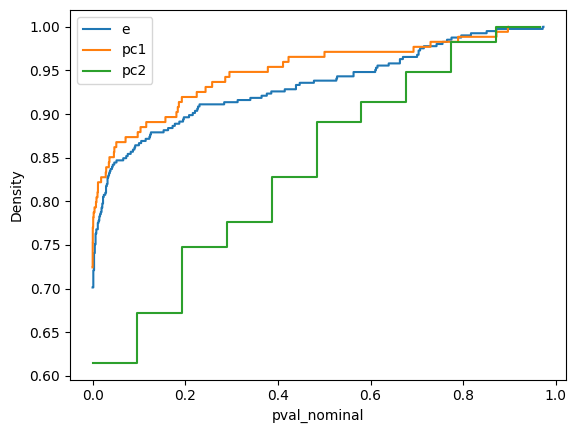

In [334]:
sns.histplot(e_nominal_ps['pval_nominal'], stat='density', element="step", fill=False,cumulative=True, label='e')
sns.histplot(pc1_nominal_ps['pval_nominal'], stat='density', element="step", fill=False,cumulative=True, label='pc1')
sns.histplot(pc2_nominal_ps['pval_nominal'], stat='density', element="step", fill=False,cumulative=True, label='pc2')
plt.legend()